In [95]:
import pandas as pd
import scipy.optimize as opt

Df = pd.read_csv("../../membershipchainservice/Data/messages.txt")
Df_storage = pd.read_csv("../../membershipchainservice/Data/storage.txt")
Df_storage

,Name,Function,storage,epoch
0,node_0,Pings,168,1
1,node_3,Pings,168,1
2,node_1,Pings,168,1
3,node_2,Pings,168,1
4,node_5,Pings,344,2
...,...,...,...,...
413,node_26,Pings,13128,19
414,node_5,Pings,13128,19
415,node_7,Pings,13128,19
416,node_6,Pings,13128,19


In [96]:
Df["nb Nodes"] = Df["epoch"].apply(lambda epoch : len(Df[Df["epoch"]==epoch]["Name"].unique()))
Df_storage["nb Nodes"] = Df_storage["epoch"].apply(lambda epoch : len(Df[Df["epoch"]==epoch]["Name"].unique()))

[ 1.96987528 -0.76095337]


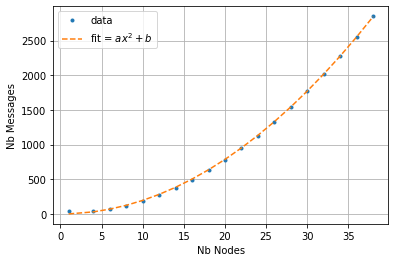

In [97]:
def func_x2(x, a, b):
     return a * x**2 + b
    
import matplotlib.pyplot as plt
import numpy as np

sums = Df.groupby("nb Nodes").sum()
X = np.array(list(sums.index)[:-1])
Y = np.array(list(sums["nb_messages"])[:-1])
plt.plot(X,Y, ".")
plt.grid(True)
plt.ylabel("Nb Messages")
plt.xlabel("Nb Nodes")

optimizedParameters, cov = opt.curve_fit(func_x2, X, Y);

print(optimizedParameters)
plt.plot(X, func_x2(X, *optimizedParameters), "--")
#plt.loglog(X, func_x2(X, *optimizedParameters), "--")

plt.legend(["data", "fit = $ax^2 + b$"])

plt.savefig("../../latex/thesis_template/figures/messages-plot.pdf")

,Name,Function,storage,epoch,nb Nodes
0,node_0,Pings,168,1,6
7,node_0,Pings,344,2,8
15,node_0,Pings,584,3,10
27,node_0,Pings,888,4,12
28,node_0,Pings,1256,5,14
41,node_0,Pings,1688,6,16
55,node_0,Pings,2184,7,18
72,node_0,Pings,2744,8,20
88,node_0,Pings,3368,9,22
111,node_0,Pings,4056,10,24


[   7.49848577 -208.70260448]


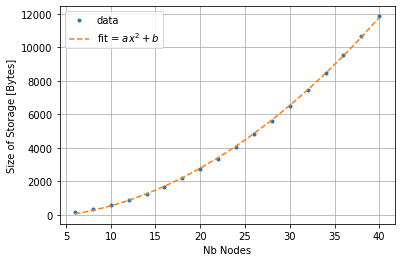

In [101]:
import matplotlib.pyplot as plt

data = Df_storage[Df_storage["Name"]=="node_0"]
display(data)

X = data["nb Nodes"][:-1]
Y = data["storage"][:-1]

plt.plot(X,Y, ".")

plt.grid(True)
plt.ylabel("Size of Storage [Bytes]")
plt.xlabel("Nb Nodes")

optimizedParameters, cov = opt.curve_fit(func_x2, X, Y);

print(optimizedParameters)
plt.plot(X, func_x2(X, *optimizedParameters), "--")
#plt.loglog(X, func_x2(X, *optimizedParameters), "--")

plt.legend(["data", "fit = $ax^2 + b$"])

plt.savefig("../../latex/thesis_template/figures/storage-plot.pdf")

In [62]:
data

,Name,Function,storage,epoch,nb Nodes
3,node_0,Pings,264,1,4
9,node_0,Pings,392,2,6
12,node_0,Pings,520,3,8
25,node_0,Pings,648,4,10
30,node_0,Pings,792,5,12
43,node_0,Pings,936,6,14
64,node_0,Pings,1080,7,16
87,node_0,Pings,1224,8,18
105,node_0,Pings,1368,9,20
